In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neural_network import MLPClassifier

In [2]:
def visualize_letter_plot(vec, width=5, title="字母像素（5×5）"):
    """用 matplotlib 画出 5×5 像素图，课堂投屏更直观。"""
    grid = np.array(vec, dtype=float).reshape((width, width))
    plt.figure(figsize=(3, 3))
    plt.imshow(grid, cmap='Greys', vmin=0, vmax=1)
    plt.title(title)
    plt.xticks([]); plt.yticks([])
    # 加细网格线，帮助学生观察
    for i in range(width+1):
        plt.axhline(i-0.5, color='lightgray', linewidth=0.5)
        plt.axvline(i-0.5, color='lightgray', linewidth=0.5)
    plt.tight_layout()
    plt.show()

## 给下面的数据 X中添加两个新的字母 F和G
- 需要注意 X中添加了 F和G y中也要对应添加F,G

In [3]:
#准备数据 (X: 字母的像素数据, y: 对应的字母标签)
# (此处展示预先准备好的几个字母的0/1列表和标签)
X = [
    # A
    [0,1,1,1,0,
     1,0,0,0,1,
     1,1,1,1,1,
     1,0,0,0,1,
     1,0,0,0,1],
    # B
    [1,1,1,1,0,
     1,0,0,0,1,
     1,1,1,1,0,
     1,0,0,0,1,
     1,1,1,1,0],
    # C
    [0,1,1,1,1,
     1,0,0,0,0,
     1,0,0,0,0,
     1,0,0,0,0,
     0,1,1,1,1],
    # D
    [1,1,1,0,0,
     1,0,0,1,0,
     1,0,0,1,0,
     1,0,0,1,0,
     1,1,1,0,0],
    # E
    [1,1,1,1,1,
     1,0,0,0,0,
     1,1,1,1,0,
     1,0,0,0,0,
     1,1,1,1,1]
]
y = ['A','B','C','D','E']

- <font color = 'red'> TODO 在下面的cell里写代码</font>

In [4]:
f =  [1,1,1,1,1,
     1,0,0,0,0,
     1,1,1,1,0,
     1,0,0,0,0,
     1,0,0,0,0]

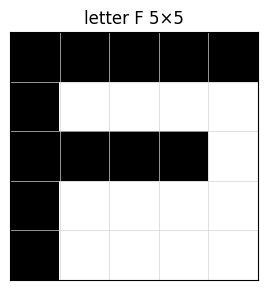

In [5]:
visualize_letter_plot(f, width=5, title="letter F 5×5")

- <font color = 'red'> TODO 在下面的cell里写代码</font>

In [6]:
g =  [0,1,1,1,1,
     1,0,0,0,0,
     1,0,1,1,1,
     1,0,0,0,1,
     0,1,1,1,1]

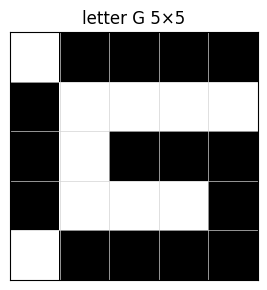

In [7]:
visualize_letter_plot(g, width=5, title="letter G 5×5")

In [8]:
# 把新创建的数据添加到训练数据中
X.append(f)  # 给X加1个完整的F样本（25个像素）
X.append(g)  # 给X加1个完整的G样本（25个像素）
y.append('F')  # 给y加F的标签
y.append('G')  # 给y加G的标签

## 使用添加了F和G的数据重新运行下面的代码训练模型

### 定义并创建神经网络模型

In [9]:
mlp = MLPClassifier(
    hidden_layer_sizes=(30, 20), # 定义了两个隐藏层，第一个有30个神经元，第二个有20个
    max_iter=2000,              # 最大“学习轮数”（农场总管最多学习2000季）
    solver='adam',              # 这是高效的“权重调整”算法
    random_state=42             # 保证我们每次运行结果都一样，方便教学
)
print("神经网络模型创建成功！")

神经网络模型创建成功！



### 训练模型 (这就是“反向传播”学习的过程)
- <font color = 'red'> TODO: 使用 X 和 y 数据来训练你的 mlp 模型</font>

In [10]:
mlp.fit(X,y)
print("模型训练完成！它已经学会了识别这些字母。")

模型训练完成！它已经学会了识别这些字母。


### 进行预测
-  <font color = 'red'>TODO 创建一个带有一点“噪声”（错误像素）的'F'</font>

In [11]:
noisy_F =[1,1,1,1,0,
     1,0,0,0,0,
     1,1,1,1,0,
     1,0,0,0,0,
     1,0,0,0,0] # 中间故意改错了一位
prediction = mlp.predict([noisy_F])
print(f"对于这个有点瑕疵的字母，模型的识别结果是: {prediction[0]}")

对于这个有点瑕疵的字母，模型的识别结果是: F


## 此时把下面的letter_X 传递给刚才训练好的模型 让模型预测能否识别出X来, 为什么?

In [12]:
letter_X = [
    1,0,0,0,1,
    0,1,0,1,0,
    0,0,1,0,0,
    0,1,0,1,0,
    1,0,0,0,1,
]
prediction = mlp.predict([letter_X])
print(f"模型的识别结果是: {prediction[0]}")

模型的识别结果是: E


## 如果想让模型能够识别出X来,你该怎么办?